Importamos las Librerias a usar:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Le pasamos la ruta del archivo a leer. Si esta en una carpeta local, la ruta es el nombre del archivo que contiene los datos:

In [4]:
df = pd.read_csv('titanic3.csv')


Pedimos que se nos visualicen las primeras cinco lineas del conjunto de datos:

In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Guardamos en la variable "names" la serie que contiene todos los nombres y los mostramos por consola:

In [6]:
names = df["name"].values
print(names)

['Allen, Miss. Elisabeth Walton' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine' ... 'Zakarian, Mr. Mapriededer'
 'Zakarian, Mr. Ortin' 'Zimmerman, Mr. Leo']


Convertimos toda esa lista de nombres en su forma minuscula y los mostramos por consola para comprobar su cambio:

In [7]:
names = list(map(lambda x : x.lower(), names))
names

['allen, miss. elisabeth walton',
 'allison, master. hudson trevor',
 'allison, miss. helen loraine',
 'allison, mr. hudson joshua creighton',
 'allison, mrs. hudson j c (bessie waldo daniels)',
 'anderson, mr. harry',
 'andrews, miss. kornelia theodosia',
 'andrews, mr. thomas jr',
 'appleton, mrs. edward dale (charlotte lamson)',
 'artagaveytia, mr. ramon',
 'astor, col. john jacob',
 'astor, mrs. john jacob (madeleine talmadge force)',
 'aubart, mme. leontine pauline',
 'barber, miss. ellen "nellie"',
 'barkworth, mr. algernon henry wilson',
 'baumann, mr. john d',
 'baxter, mr. quigg edmond',
 'baxter, mrs. james (helene delaudeniere chaput)',
 'bazzani, miss. albina',
 'beattie, mr. thomson',
 'beckwith, mr. richard leonard',
 'beckwith, mrs. richard leonard (sallie monypeny)',
 'behr, mr. karl howell',
 'bidois, miss. rosalie',
 'bird, miss. ellen',
 'birnbaum, mr. jakob',
 'bishop, mr. dickinson h',
 'bishop, mrs. dickinson h (helen walton)',
 'bissette, miss. amelia',
 'bjornst

Filtramos esa lista de nombres y comprobamos si existe alguna persona de nombre "rose" como en la pelicula taquillera que lleva el mismo nombre del archivo csv que que contiene la data que estamos trabajando:

In [8]:
names = list(filter(lambda x: "rose" in x, names))
print(names)

['rosenbaum, miss. edith louise', 'rosenshine, mr. george ("mr george thorne")', 'hood, mr. ambrose jr', 'aks, mrs. sam (leah rosen)']


¿Qué Conclusiones obtienes al respecto?

In [9]:
#Comprobamos el tipo de dato 
print(type(df.survived.value_counts()))

<class 'pandas.core.series.Series'>


Guradamos en la variable "amount", el conteo total por categoría en la variable "survived"

In [10]:
amount = df.survived.value_counts(dropna=False)
amount

0    809
1    500
Name: survived, dtype: int64

Value_counts() nos retorna una serie que contiene la cantidad de sobrevivientes. Murieron 809 personas y sobrevivieron 500 personas.

Veamos ahora como mostrar los lienzos sobre los cuales podemos graficar datos:

809 500


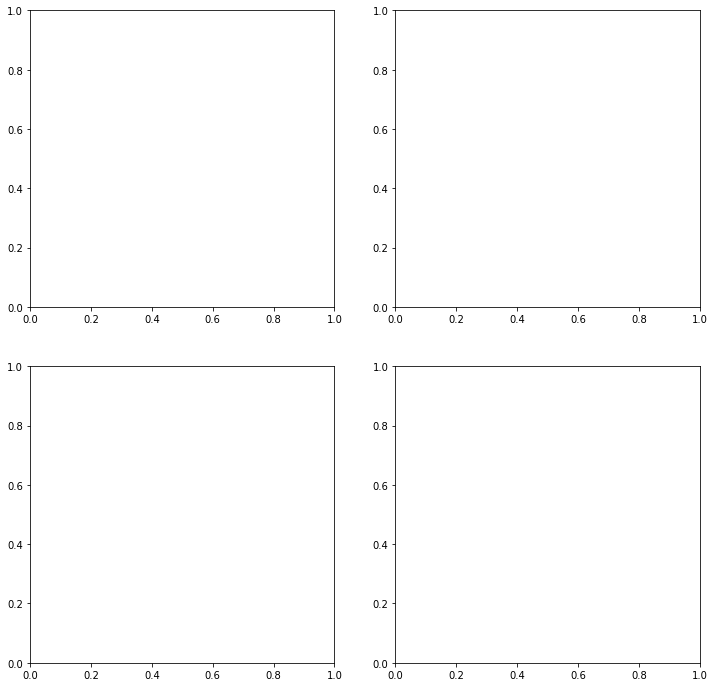

In [18]:
plt.figure(figsize=(12,12))

plt.subplot2grid((2,2),(0,0))
plt.subplot2grid((2,2),(1,0))
plt.subplot2grid((2,2),(0,1))
plt.subplot2grid((2,2),(1,1))

print(amount[0],amount[1])

Agreguemos algunos atributos a estos lienzos para que nos muestre la variable "survived" a través de un gráfico de barras:

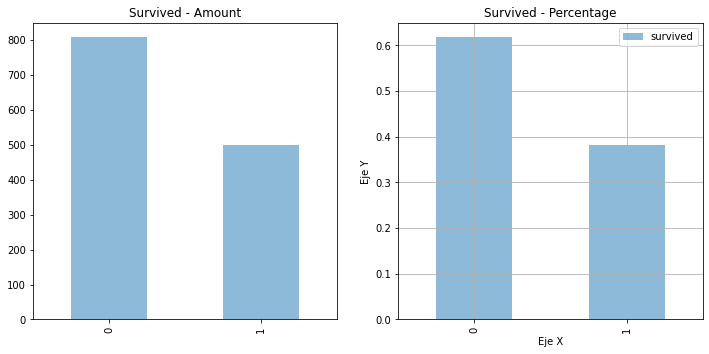

In [11]:
plt.figure(figsize=(12,12))

plt.subplot2grid((2,2),(0,0)) # Grid de tamaño 2x2 en la posición (0,0)
df.survived.value_counts().plot(kind='bar', alpha=0.5)  #seriexxxx.plot()
plt.title('Survived - Amount')

plt.subplot2grid((2,2),(0,1))
df.survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Survived - Percentage')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.grid()



¿Que podemos inferir a partir de la gráfica?

In [12]:
# Importamos libreria para la visualizacion del grafico de Densidad.
# Instala scipy con pip install scipy
import scipy

Como en el conjunto de datos la variable "pclass" contiene solo tres categorías, entonces grafiquemos en un mismo lienzo las gráficas de densidad de cada una de ellas:

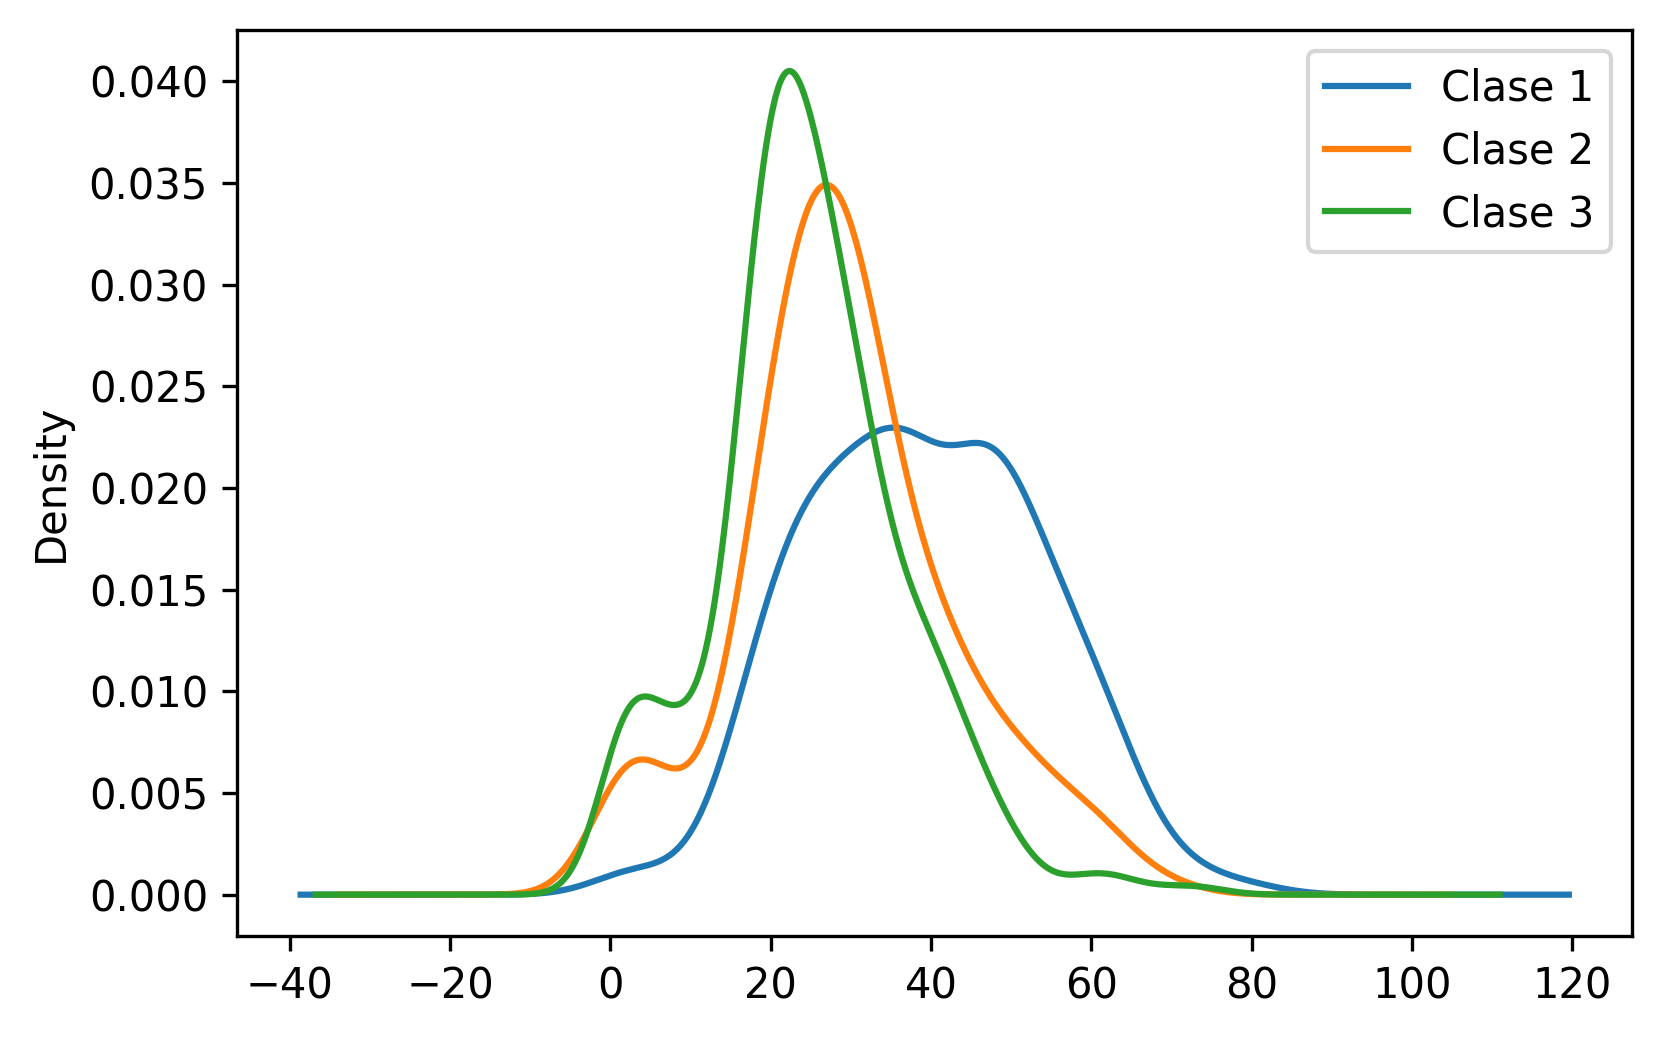

In [13]:
#Grafica de Distribuciones por Clases

plt.figure(dpi=300)

for i in [1,2,3]:
    df.age[df.pclass == i].plot(kind='kde', label =f"Clase {i}")

plt.legend()

La gráfica muestra que la media de edades de las personas de primera clase es mayor a la media de edades de las personas de segunda clase y a su vez, es mayor a la media de edades de las personas de tercera clase.

Mostremos ahora la variable "edad" y "clase" a través de un scatterplot, donde cada punto representa una persona:

<Figure size 1800x1200 with 0 Axes>

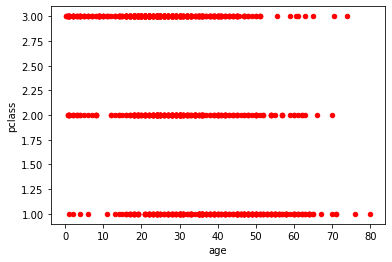

In [14]:
plt.figure(dpi=300)
df.plot(kind='scatter', x='age', y='pclass', color='red')
plt.show()

Agreguemos una nueva columna o serie llamada "color" a nuestra tabla, donde podamos asociar un color a cada persona de acuerdo a su estado de supervivencia y veamos de nuevo la tabla para comprobar que nos aparece actualizada con la nueva columna que le agregamos y su respectiva característica:

In [15]:
plt.figure(dpi=300)
df["color"] = df["survived"]. apply(lambda x : "red" if x ==0 else "blue")

df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,color
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",blue
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",blue
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",red
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",red
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",red


<Figure size 1800x1200 with 0 Axes>

Vemos en nuestra tabla que ya aparece la nueva columna "color". En estas nuevas condiciones, veamos ahora cómo se ve nuestro gráfico scatterplot ahora:

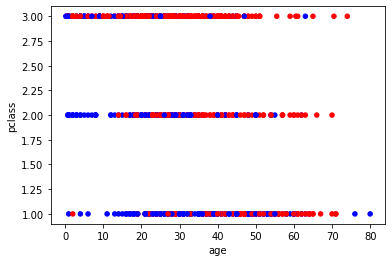

In [16]:
df.plot(kind='scatter', x='age', y='pclass', c='color')
plt.show()

En esta ultima grafica ya podemos observar la cantidad de personas que sobrevivieron o no, en funcion a su clase social y sexo. ¿A qué conclusiones puedes llegar a partir de la misma?

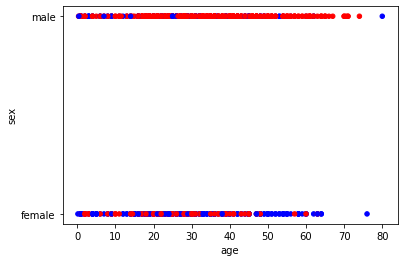

In [17]:
df.plot(kind='scatter', x='age', y='sex', c='color')
plt.show()

¿Que conclusiones nos permite obtener esta gráfica?

Construyamos ahora un Histograma que nos permita visualizar la distribución de todas las edades:

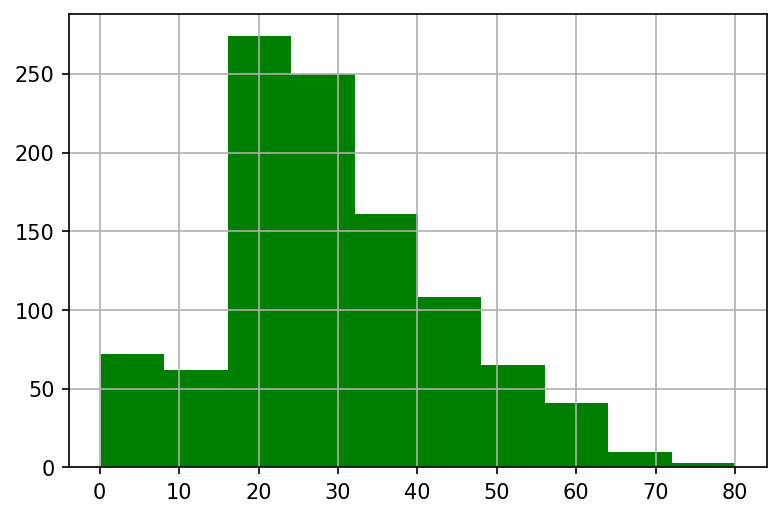

In [18]:
plt.figure(dpi= 150)
df.age.hist(color= 'green')
plt.show()

Realicemos una restricción sobre la data anterior y veamos un histograma de edades pero ahora solo de los sobrevivientes:

<AxesSubplot:>

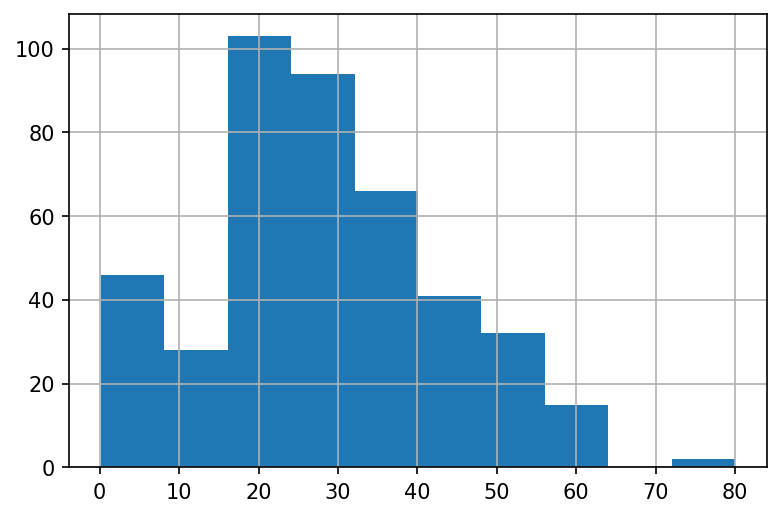

In [19]:
plt.figure(dpi= 150)
df[df["survived"] == 1].age.hist()

¿Cuál es el rango de edades que tuvo mayor número de sobrevivientes según el histograma?

Veamos ahora un histograma de edades de las personas que no sobrevivieron:

<AxesSubplot:>

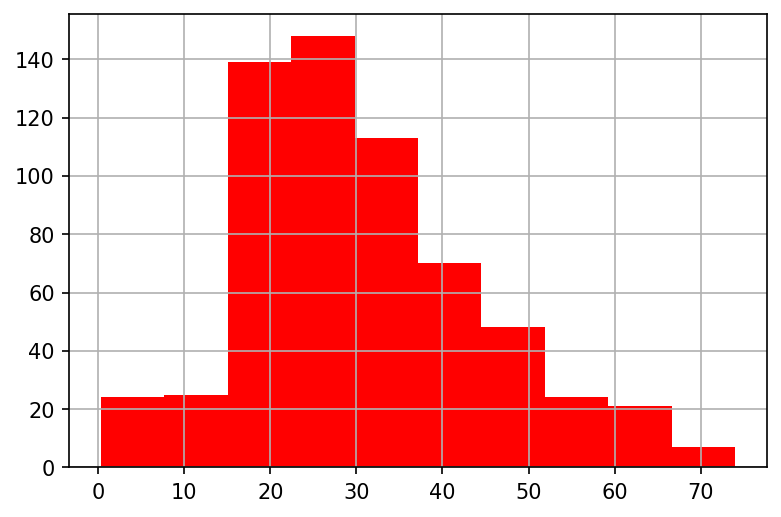

In [20]:
plt.figure(dpi= 150)
df[df["survived"] == 0].age.hist(color='red')

¿Cuál es el rango de edades que tuvo mayor número de  NO sobrevivientes según el histograma?

Comparemos ahora en un histograma, las edades de los sobrevivientes de primera clase:

<AxesSubplot:>

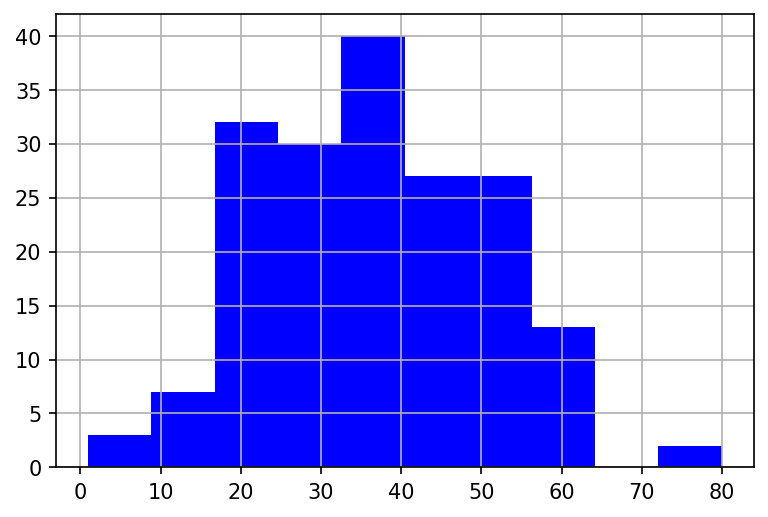

In [21]:
plt.figure(dpi= 150)
df[(df['survived'] == 1) & (df['pclass'] == 1)].age.hist(color ='blue')

¿Qué información puedes inferir a partir de la gráfica?

Vamos ahora a discriminar la variable "survived" por la variable "sex"  y "pclass"; es deci, queremos ver que tan determinante era el género y la clase para poder sobrevivir:

<AxesSubplot:>

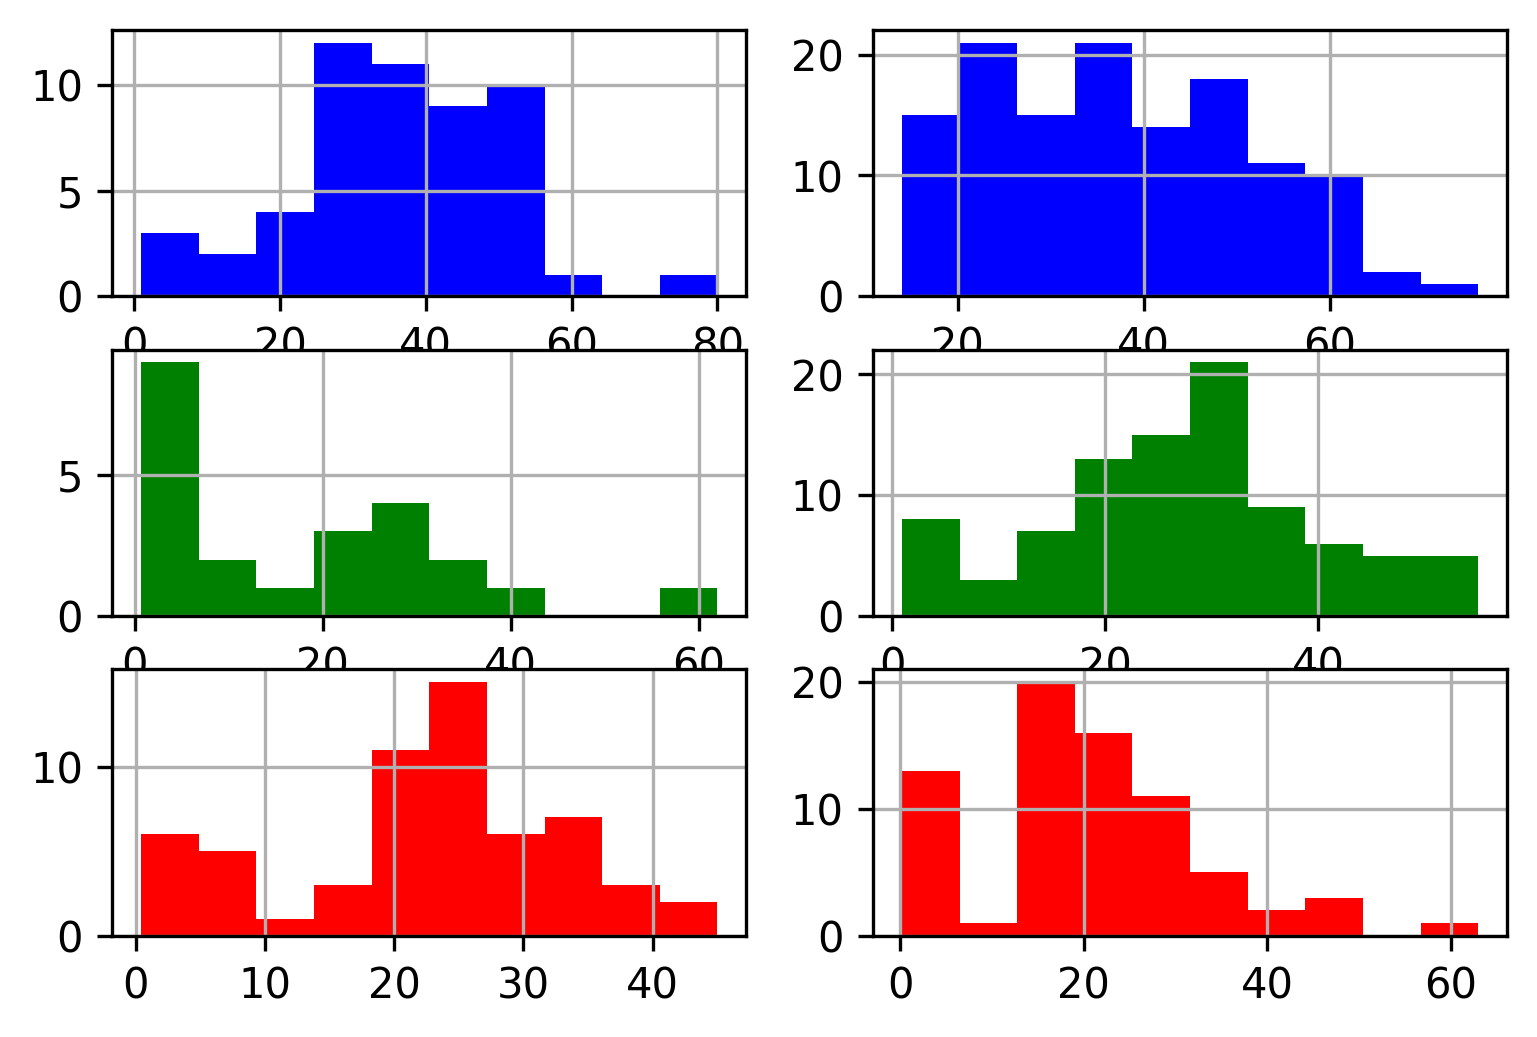

In [22]:
plt.figure(dpi=300)

plt.subplot2grid((3,2),(0,0))
df[(df["survived"]== 1) & (df["pclass"] == 1) & (df["sex"] == "male")].age.hist(color="blue")

plt.subplot2grid((3,2),(0,1))
df[(df["survived"]== 1) & (df["pclass"] == 1) & (df["sex"] == "female")].age.hist(color="blue")

plt.subplot2grid((3,2),(1,0))
df[(df["survived"]== 1) & (df["pclass"] == 2) & (df["sex"] == "male")].age.hist(color="green")

plt.subplot2grid((3,2),(1,1))
df[(df["survived"]== 1) & (df["pclass"] == 2) & (df["sex"] == "female")].age.hist(color="green")

plt.subplot2grid((3,2),(2,0))
df[(df["survived"]== 1) & (df["pclass"] == 3) & (df["sex"] == "male")].age.hist(color="red")

plt.subplot2grid((3,2),(2,1))
df[(df["survived"]== 1) & (df["pclass"] == 3) & (df["sex"] == "female")].age.hist(color="red")

¿Qué puedes inferir a partir de las gráficas?¿El género determinaba la probabilidad de sobrevivir en cada clase social?

Analicemos ahora la serie "boat" y veamos si podemos relacionar esta variable a la variable "survived". Dentro la serie "boat" existen varios datos cuyo valor asociado es un 'nan'; los cuales hacen referencia a datos perdidos. Para poder operar estos datos, asociemoslos a un valor "0" y "1" a cualquier otro valor. Con esto, estaremos asociando a las personas que fueron asignadas a un barco con el número "1" y a las que no, con un número "0". Así:

In [28]:
#creamos una nueva columna con los mismos datos de "boat" para poder operar desde alli:
df["boat_convert"] = df["boat"]
#Llenamos con ceros donde hallan 'nan'
df["boat_convert"] = df["boat"].fillna(0)
#Aplicamos una funcion que me convierte en 1 cualquier valor distinto de 0:
df["boat_convert"] = df["boat_convert"].apply(lambda x : 1 if x!=0 else 0)
#veamos ahora como quedaron los datos de la columna "boat_convert":
df["boat_convert"]

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: boat_convert, Length: 1309, dtype: int64

De esta manera, las personas con un dato igual a 1 en la columna "boat_convert" indica que son personas que fueron asociadas a un bote de rescate, caso contrario, tendrán el valor 0 en dicha columna.

Veamos en total cuántas personas tuvieron bote, y cuántos no lo tuvieron:

In [29]:
df["boat_convert"].value_counts(dropna = False)

0    823
1    486
Name: boat_convert, dtype: int64

Esto nos indica que solo 486 personas pudieron abordar un bote salvavidas de un total de 1309 personas.

Visualizemos a través de un histograma la proporcion de hombres y mujeres que gozaron de un bote salvavidas:

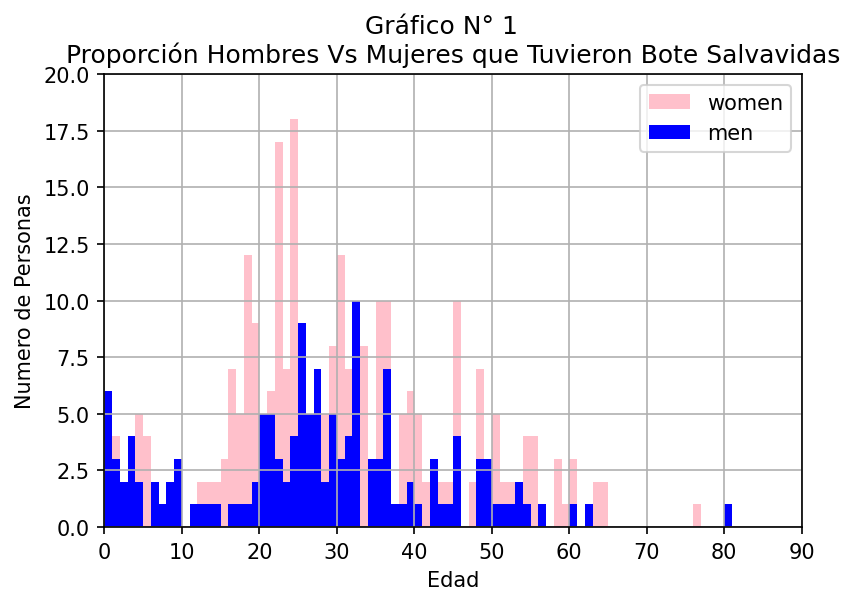

In [33]:
plt.figure(dpi=150)
df[(df["boat_convert"] == 1) & (df["sex"] == "female")].age.hist(color="pink", bins = range(0,100,1), label = "women")
df[(df["boat_convert"] == 1) & (df["sex"] == "male")].age.hist(color="blue", bins = range(0,100,1), label = "men")
plt.axis([0,90,0,20])
plt.xlabel("Edad")
plt.ylabel("Numero de Personas")
plt.suptitle("Gráfico N° 1")
plt.title("Proporción Hombres Vs Mujeres que Tuvieron Bote Salvavidas")
plt.legend()


¿Qué información puedes inferir a partir de la gráfica en función a las variables intervinientes?